In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns


In [37]:
# Load JSON data
id_to_features = json.load(open('musae_git_features.json'))

# Create a DataFrame
df = pd.DataFrame({"features": list(id_to_features.values())})

# Use pd.Series to ensure compatibility with value_counts
matrix = df['features'].apply(lambda x: pd.Series(x).value_counts()).fillna(0).astype(int)

# Extract keys as indices
ids = list(id_to_features.keys())
matrix.index = ids

# Reindex matrix columns alphabetically
matrix = matrix.reindex(sorted(matrix.columns), axis=1)

target = pd.read_csv('musae_git_target.csv', usecols=['name', 'ml_target'])
edges = pd.read_csv('musae_git_edges.csv')
matrix.reset_index(drop=True, inplace=True)
target.reset_index(drop=True, inplace=True)
table = pd.concat([matrix, target], axis=1)
table
table.to_csv('full_table.csv', index=False)


In [35]:
print(target)
print(edges)

                 name  ml_target
0              Eiryyy          0
1          shawflying          0
2         JpMCarrilho          1
3           SuhwanCha          0
4        sunilangadi2          1
...               ...        ...
37695  shawnwanderson          1
37696       kris-ipeh          0
37697        qpautrat          0
37698        Injabie3          1
37699   caseycavanagh          0

[37700 rows x 2 columns]
         id_1   id_2
0           0  23977
1           1  34526
2           1   2370
3           1  14683
4           1  29982
...       ...    ...
288998  37527  37596
288999  37529  37601
289000  37644   2347
289001  25879   2347
289002  25616   2347

[289003 rows x 2 columns]


In [41]:
print(table.isnull().sum())
print(table.info())
table.describe(include='all')
table.describe(include='all').to_csv('describe_output.csv')

0            0
1            0
2            0
3            0
4            0
            ..
4002         0
4003         0
4004         0
name         0
ml_target    0
Length: 4007, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37700 entries, 0 to 37699
Columns: 4007 entries, 0 to ml_target
dtypes: int64(4006), object(1)
memory usage: 1.1+ GB
None


Number of Numerical Variables: 4006
Number of Categorical Variables: 1
Class Balance (Proportions):
ml_target
0    0.741671
1    0.258329
Name: proportion, dtype: float64


C:\Users\param\AppData\Local\Temp\ipykernel_13724\760391964.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


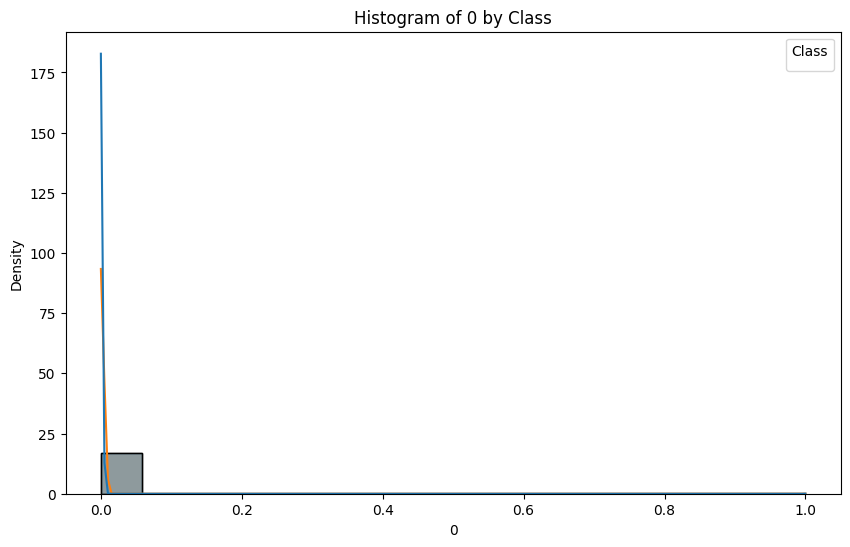

In [40]:
# Determine categorical and numerical variables
numerical_vars = table.select_dtypes(include=['number']).columns
categorical_vars = table.select_dtypes(exclude=['number']).columns

# Display counts of categorical and numerical variables
len_numerical = len(numerical_vars)
len_categorical = len(categorical_vars)
print(f"Number of Numerical Variables: {len_numerical}")
print(f"Number of Categorical Variables: {len_categorical}")

# Descriptive statistics for numerical variables
if len(numerical_vars) < 64:
    desc_stats = table[numerical_vars].describe()
    print(desc_stats)

# Y class balance (proportions)
class_balance = table['ml_target'].value_counts(normalize=True)
print("Class Balance (Proportions):")
print(class_balance)

# Plot histogram for a numerical variable by class
selected_variable = numerical_vars[0]  # Change index to the desired numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(data=table, x=selected_variable, hue='ml_target', kde=True, stat="density", common_norm=False)
plt.title(f"Histogram of {selected_variable} by Class")
plt.xlabel(selected_variable)
plt.ylabel("Density")
plt.legend(title="Class")
plt.show()


     0     1     2     3     4     5     6     7       8       9   ...  32  \
0  1574  3773  3571  2672  2478  2534  3129  3077  1171.0  2045.0  ... NaN   
1  1193   376    73   290  3129  1852  3077  1171  1022.0  2045.0  ... NaN   
2  1574  3773   925  1728  2815  2963  3077   364  1171.0   536.0  ... NaN   
3  3964  3773  4003   928  1852  3077   364  1022  3763.0  2045.0  ... NaN   
4  1929  3773  1793  3511  1290  3129  3077   364  1171.0  1022.0  ... NaN   

   33  34  35  36  37  38  39  40  41  
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 42 columns]


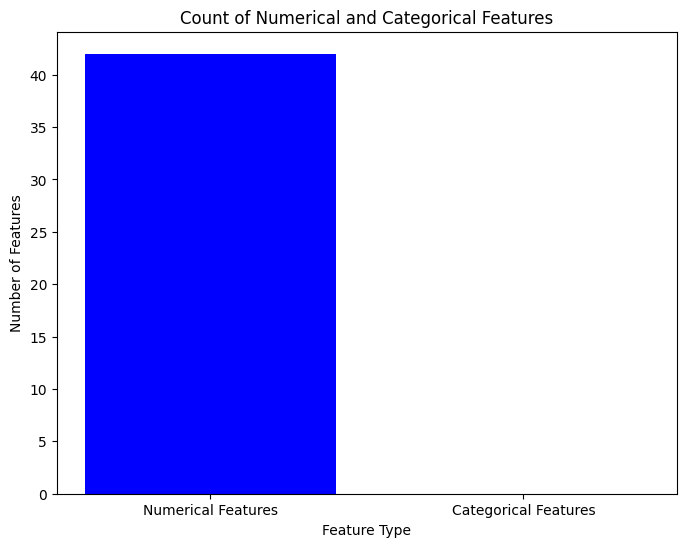

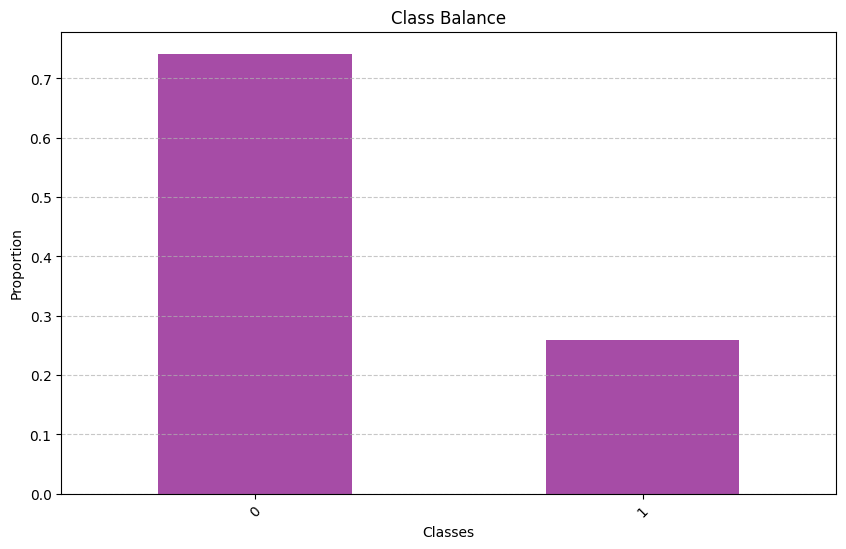

In [30]:
# Load JSON and convert to DataFrame
features = pd.DataFrame.from_dict(json.load(open('musae_git_features.json')), orient='index')

# Load the target data
target = pd.read_csv('musae_git_target.csv', usecols=['name', 'ml_target'])

# Identify categorical and numerical variables in features
numerical_features = features.select_dtypes(include=['number']).columns
categorical_features = features.select_dtypes(exclude=['number']).columns

# Descriptive statistics
desc_stats = features.describe(include='all') if features.shape[1] < 64 else None

# Y class balance
class_balance = target['ml_target'].value_counts(normalize=True)

# Display data
len_numerical = len(numerical_features)
len_categorical = len(categorical_features)


plt.figure(figsize=(8, 6))
plt.bar(['Numerical Features', 'Categorical Features'], [len_numerical, len_categorical], color=['blue', 'orange'])
plt.title('Count of Numerical and Categorical Features')
plt.ylabel('Number of Features')
plt.xlabel('Feature Type')
plt.show()

# Visualize class balance
class_balance.plot(kind='bar', figsize=(10, 6), color='purple', alpha=0.7)
plt.title('Class Balance')
plt.ylabel('Proportion')
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

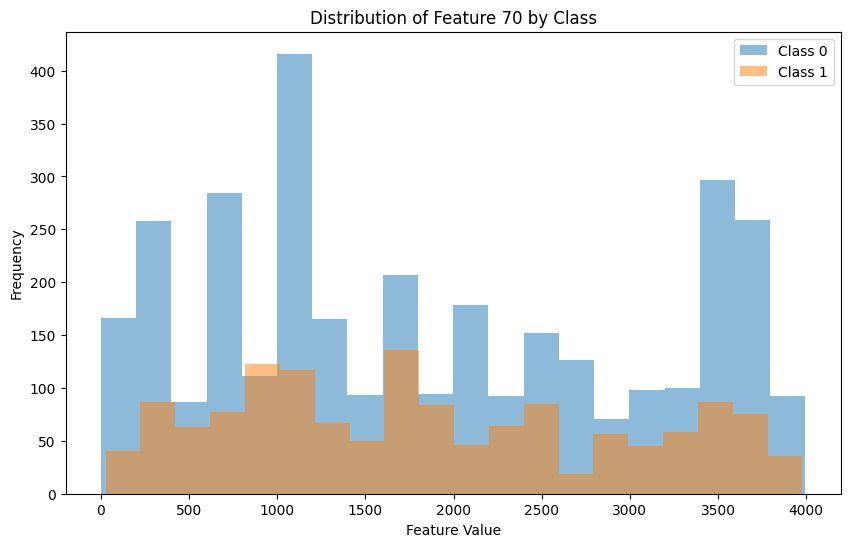

In [ ]:
# Align indices between features and target
aligned_features = features.set_index(target.index)  # Align features to target indices

# Select the first numerical feature
feature_to_plot = aligned_features.iloc[:, 21]

# Classes in the target variable
classes = target['ml_target'].unique()

# Plot histograms
plt.figure(figsize=(10, 6))

for cls in classes:
    plt.hist(
        feature_to_plot[target['ml_target'] == cls],
        bins=20,
        alpha=0.5,
        label=f"Class {cls}"
    )

plt.title(f"Distribution of Feature 70 by Class")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()
